In [1]:
#https://www.tensorflow.org/tutorials/keras/save_and_load
#https://keras.io/visualization/

In [2]:
import tensorflow as tf
import numpy as np
import math
import matplotlib.pyplot as plt
from tensorflow import keras
%matplotlib inline

/Users/ayub/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
seed=42
np.random.seed(seed)
tf.set_random_seed(seed)
N = 1000  # num_samples_per_class
D = 2  # dimensions
C = 3  # num_classes
H = 100  # num_hidden_units

In [4]:
X = np.zeros((N * C, D), dtype=np.float64)
y = np.zeros(N * C, dtype=np.float64)

for i in range(C):
    index = 0
    r = np.linspace(0.0, 1.0, N)
    t = np.linspace(
        i * 2 * math.pi / C,
        (i + 2) * 2 * math.pi / C,
        N
    ) + np.random.randn(N) * 0.1
    
    for ix in range(N * i, N * (i + 1)):
        X[ix] = np.multiply(r[index],((np.float64(math.sin(t[index])), np.float64(math.cos(t[index])))))
        y[ix] = i
        index += 1

print("SHAPES:")
print("-------------------")
print("X:"+ str(X.shape))
print("y:"+ str(y.shape))


SHAPES:
-------------------
X:(3000, 2)
y:(3000,)


In [5]:
def plot_model(X, y, model, e=.0, auto=False):
    """
    Plot the model from torch weights.
    """
    
    X = X.numpy()
    y = y.numpy(),
    w1 = torch.transpose(model.fc1.weight.data, 0, 1).numpy()
    b1 = model.fc1.bias.data.numpy()
    w2 = torch.transpose(model.fc2.weight.data, 0, 1).numpy()
    b2 = model.fc2.bias.data.numpy()
    
    h = 0.01

    x_min, x_max = (-1.1, 1.1)
    y_min, y_max = (-1.1, 1.1)
    
    if auto is True:
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], w1) + b1), w2) + b2
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)
    fig = plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
    plt.axis((-1.1, 1.1, -1.1, 1.1))
    plt.axis('square')
    if auto is True:
        plt.axis((xx.min(), xx.max(), yy.min(), yy.max()))
    

In [6]:
def plot_data(X, y, d=.0, auto=False):
    """
    Plot the data.
    """
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap=plt.cm.Spectral)
    plt.axis('square')
    plt.axis((-1.1, 1.1, -1.1, 1.1))
    if auto is True: plt.axis('equal')
#     plt.savefig('spiral{:.2f}.png'.format(d))

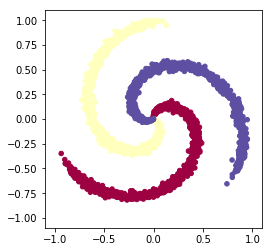

In [7]:
# Create the data
plot_data(X, y)

In [8]:

training_epochs = 500
n_neurons_in_h1 = 60
n_neurons_in_h2 = 60
learning_rate = 0.01

N = 1000  # num_samples_per_class
D = 2  # dimensions
C = 3  # num_classes
H = 100  # num_hidden_unit
n_features = N*C*D
n_classes =N*C

from tensorflow import keras


# Define a sequential model
#model = tf.keras.Sequential()
# Define the hidden layer
#model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(3000*2,)))
# Define the output layer
#model.add(tf.keras.layers.Dense(4, activation='softmax'))
model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(2,)),
    keras.layers.Dense(3, activation='softmax')
])
model.compile('adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
# Summarize the model
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                48        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 51        
Total params: 99
Trainable params: 99
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
print(X.shape)
print(y.shape)

(3000, 2)
(3000,)


In [ ]:
history = model.fit(X, y, epochs=100, validation_split=0.20)

Train on 2400 samples, validate on 600 samples
Epoch 1/100
2400/2400 [==============================] - 0s 100us/sample - loss: 0.0188 - sparse_categorical_accuracy: 0.9967 - val_loss: 14.7990 - val_sparse_categorical_accuracy: 0.0283
Epoch 2/100
2400/2400 [==============================] - 0s 94us/sample - loss: 0.0186 - sparse_categorical_accuracy: 0.9971 - val_loss: 14.8065 - val_sparse_categorical_accuracy: 0.0283
Epoch 3/100
2400/2400 [==============================] - 0s 94us/sample - loss: 0.0186 - sparse_categorical_accuracy: 0.9971 - val_loss: 14.8079 - val_sparse_categorical_accuracy: 0.0283
Epoch 4/100
2400/2400 [==============================] - 0s 98us/sample - loss: 0.0184 - sparse_categorical_accuracy: 0.9962 - val_loss: 14.8063 - val_sparse_categorical_accuracy: 0.0283
Epoch 5/100
2400/2400 [==============================] - 0s 102us/sample - loss: 0.0183 - sparse_categorical_accuracy: 0.9971 - val_loss: 14.8146 - val_sparse_categorical_accuracy: 0.0283
Epoch 6/100
2400

2400/2400 [==============================] - 0s 90us/sample - loss: 0.0145 - sparse_categorical_accuracy: 0.9979 - val_loss: 14.9968 - val_sparse_categorical_accuracy: 0.0250
Epoch 45/100
2400/2400 [==============================] - 0s 95us/sample - loss: 0.0144 - sparse_categorical_accuracy: 0.9975 - val_loss: 14.9910 - val_sparse_categorical_accuracy: 0.0267
Epoch 46/100
2400/2400 [==============================] - 0s 86us/sample - loss: 0.0142 - sparse_categorical_accuracy: 0.9975 - val_loss: 14.9953 - val_sparse_categorical_accuracy: 0.0267
Epoch 47/100
2400/2400 [==============================] - 0s 85us/sample - loss: 0.0142 - sparse_categorical_accuracy: 0.9979 - val_loss: 15.0066 - val_sparse_categorical_accuracy: 0.0250
Epoch 48/100
2400/2400 [==============================] - 0s 84us/sample - loss: 0.0141 - sparse_categorical_accuracy: 0.9975 - val_loss: 14.9941 - val_sparse_categorical_accuracy: 0.0267
Epoch 49/100
2400/2400 [==============================] - 0s 91us/sample 

In [11]:
from mlxtend.plotting import plot_decision_regions

ModuleNotFoundError: No module named 'mlxtend'

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(784,), name='digits')
x = layers.Dense(64, activation='relu', name='dense_1')(inputs)
x = layers.Dense(64, activation='relu', name='dense_2')(x)
outputs = layers.Dense(10, name='predictions')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data (these are Numpy arrays)
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

# Reserve 10,000 samples for validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

model.compile('adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
print('# Fit model on training data')
history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=3,
                    # We pass some validation for
                    # monitoring validation loss and metrics
                    # at the end of each epoch
                    validation_data=(x_val, y_val))

print('\nhistory dict:', history.history)

In [ ]:
y_train.shape
#x_train.shape
#x_train

In [ ]:
X